In [1]:
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/cardio_train.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


The Dataset contains several fields which leads to the __Presence or absence of cardiovascular disease__ within a patient.

1. __Age__ | Objective Feature | __age__ | int (days) |
2. __Height__ | Objective Feature | __height__ | int (cm) |
3. __Weight__ | Objective Feature | __weight__ | float (kg) |
4. __Gender__ | Objective Feature | __gender__ | categorical code |
5. __Systolic blood pressure__ | Examination Feature | __ap_hi__ | int |
6. __Diastolic blood pressure__ | Examination Feature | __ap_lo__ | int |
7. __Cholesterol__ | Examination Feature | __cholesterol__ | 1: normal, 2: above normal, 3: well above normal |
8. __Glucose__ | Examination Feature | __gluc__ | 1: normal, 2: above normal, 3: well above normal |
9. __Smoking__ | Subjective Feature | __smoke__ | binary |
10. __Alcohol intake__ | Subjective Feature | __alco__ | binary |
11. __Physical activity__ | Subjective Feature | __active__ | binary |
12. __Presence or absence of cardiovascular disease__ | Target Variable | __cardio__ | binary |

## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(69301, 13)

In [5]:
# checking for null values
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [6]:
# Checking the datatypes
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
#changing the datatype of weight column
df['weight'] = df['weight'].astype(int)

In [8]:
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69,130,80,2,2,0,0,1,0
1,989,14648,1,163,71,110,70,1,1,0,0,1,1
2,990,21901,1,165,70,120,80,1,1,0,0,1,0
3,991,14549,2,165,85,120,80,1,1,1,1,1,0
4,992,23393,1,155,62,120,80,1,1,0,0,1,0
5,995,21143,1,164,61,100,70,1,1,0,0,1,0
6,996,18085,1,162,72,100,70,1,1,0,0,1,0
7,997,22547,1,161,93,140,90,2,1,0,0,1,1
8,999,21250,1,157,68,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65,140,90,3,1,0,0,1,1


In [9]:
# Converting days into years in 'age' parameter
df['age'] = df['age']/365
df['age'] = df['age'].astype(int)
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0
5,995,57,1,164,61,100,70,1,1,0,0,1,0
6,996,49,1,162,72,100,70,1,1,0,0,1,0
7,997,61,1,161,93,140,90,2,1,0,0,1,1
8,999,58,1,157,68,110,80,1,1,0,0,1,0
9,1000,61,1,158,65,140,90,3,1,0,0,1,1


In [10]:
df.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [11]:
male_count = len(df[df['gender'] == 1])
female_count = len(df[df['gender'] == 2])
print("Percentage of female patients: {:.2f}%".format((female_count/len(df['gender'])) * 100))
print("Percentage of male patients: {:.2f}%".format((male_count/len(df['gender'])) * 100))

Percentage of female patients: 34.95%
Percentage of male patients: 65.05%


In [12]:
df['gender'].value_counts().to_frame()

,gender
1,45079
2,24222


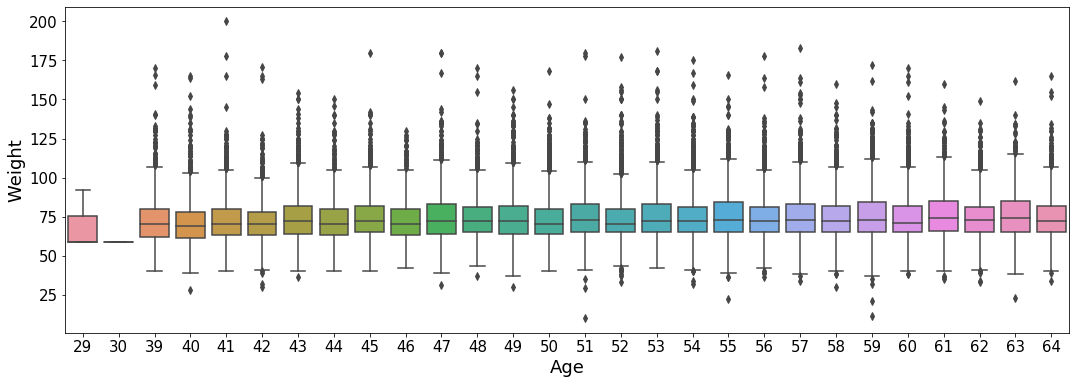

In [13]:
#box plot 
plt.figure(figsize=(18, 6))
sns.boxplot(x='age', y='weight', data=df)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Age", size=18)
plt.ylabel("Weight", size=18)
plt.show()

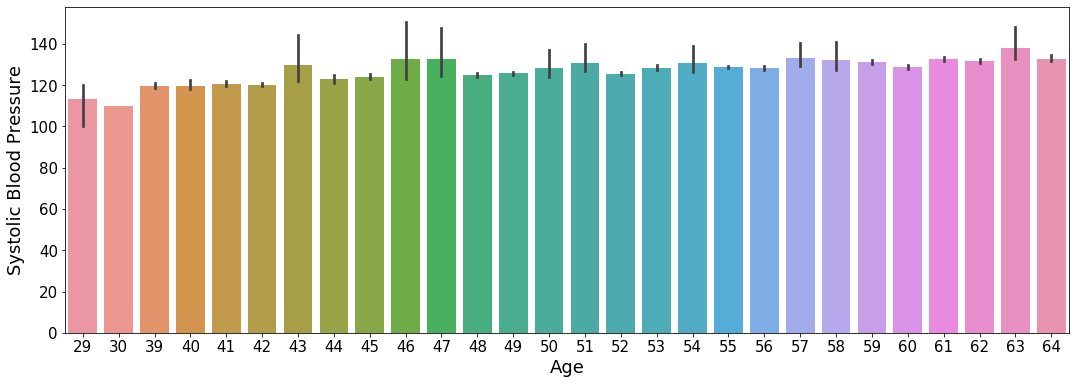

In [14]:
plt.figure(figsize=(18, 6))
sns.barplot(x= 'age', y= 'ap_hi', data= df)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Age', size= 18)
plt.ylabel('Systolic Blood Pressure', size= 18)
plt.show()

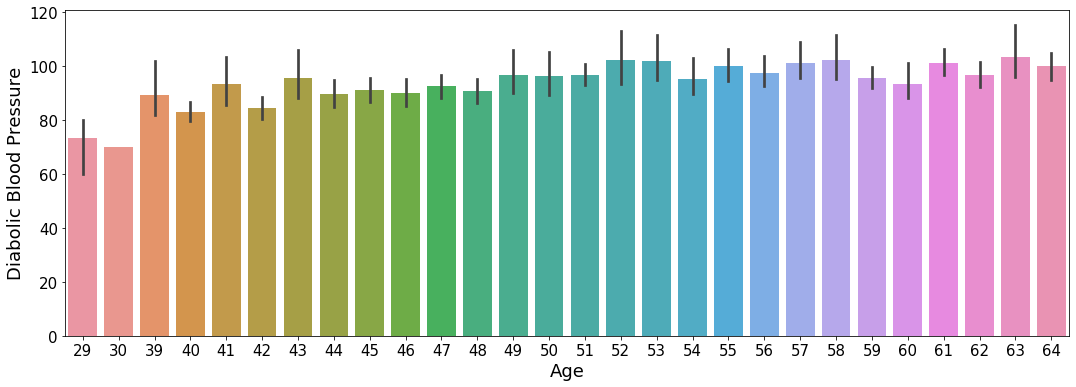

In [15]:
plt.figure(figsize=(18, 6))
sns.barplot(x= 'age', y= 'ap_lo', data= df)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Age', size= 18)
plt.ylabel('Diabolic Blood Pressure', size= 18)
plt.show()

In [16]:
def plotAge():
    facet_grid = sns.FacetGrid(df, hue= 'cardio')
    facet_grid.map(sns.kdeplot, 'age', shade= True, ax= axes[0])
    legend_labels = ['Absence', 'Presence']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel= 'Age', ylabel= 'Density')
        
    avg = df[['age', 'cardio']].groupby(['age'], as_index= False).mean()
    sns.barplot(x= 'age', y= 'cardio', data= avg, ax= axes[1])
    axes[1].set(xlabel= 'age', ylabel= 'Disease Probability')
    
    plt.clf()

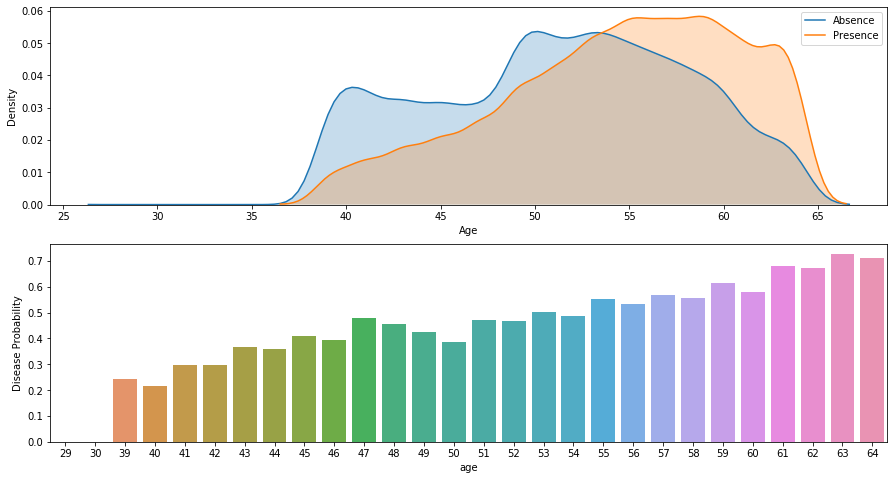

<Figure size 216x216 with 0 Axes>

In [17]:
fig_age, axes = plt.subplots(nrows= 2, ncols= 1, figsize=(15, 8))

plotAge()

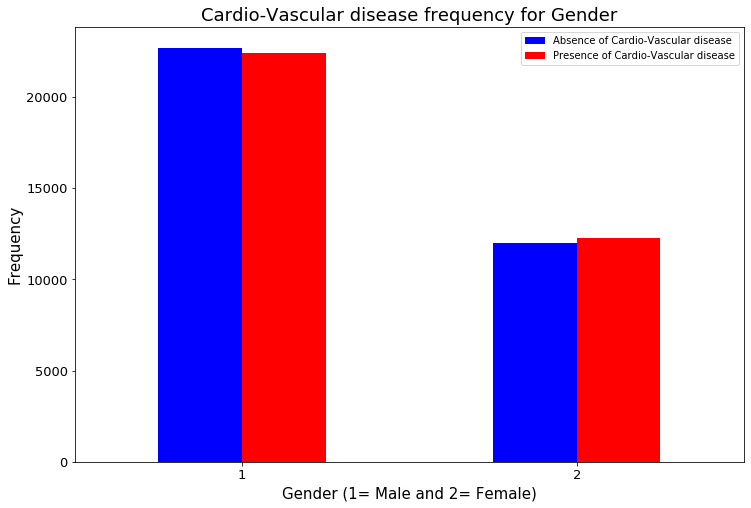

In [18]:
pd.crosstab(df['gender'], df['cardio']).plot(kind= 'bar', figsize= (12, 8), color= ['blue', 'red'])
plt.title('Cardio-Vascular disease frequency for Gender', size = 18)
plt.xlabel('Gender (1= Male and 2= Female)', size= 15)
plt.ylabel('Frequency', size= 15)
plt.xticks(rotation= 0, size= 13)
plt.yticks(size= 13)
plt.legend(['Absence of Cardio-Vascular disease', 'Presence of Cardio-Vascular disease'])
plt.show()

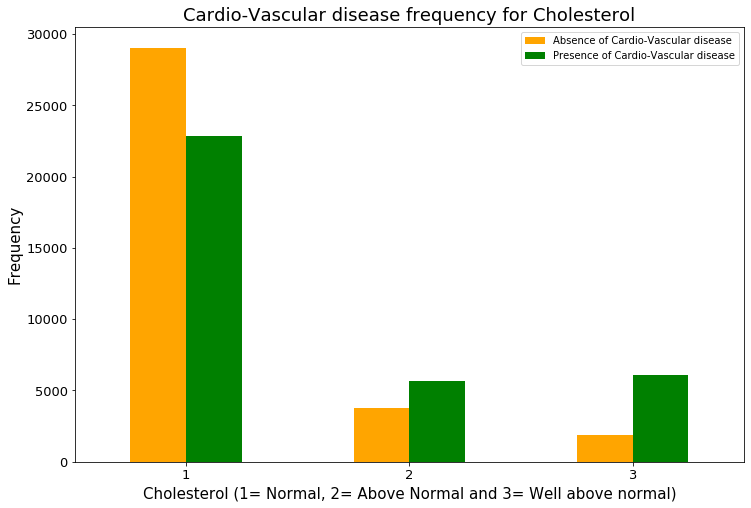

In [19]:
pd.crosstab(df['cholesterol'], df['cardio']).plot(kind= 'bar', figsize= (12, 8), color= ['orange', 'green'])
plt.title('Cardio-Vascular disease frequency for Cholesterol', size = 18)
plt.xlabel('Cholesterol (1= Normal, 2= Above Normal and 3= Well above normal)', size= 15)
plt.ylabel('Frequency', size= 15)
plt.xticks(rotation= 0, size= 13)
plt.yticks(size= 13)
plt.legend(['Absence of Cardio-Vascular disease', 'Presence of Cardio-Vascular disease'])
plt.show()

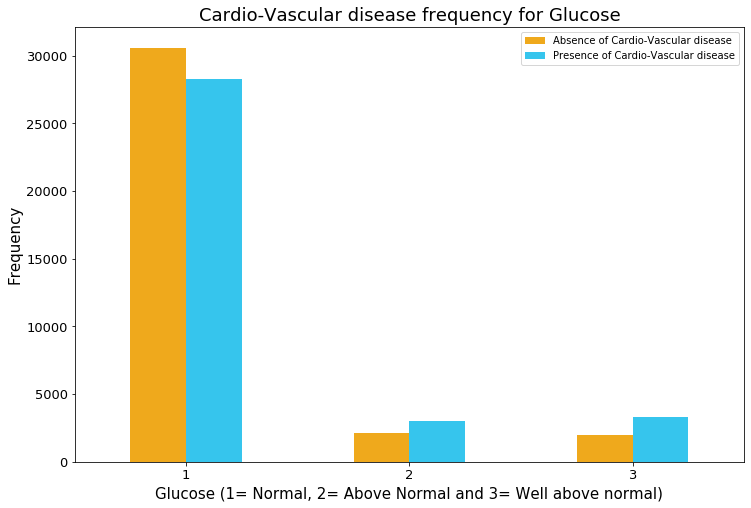

In [20]:
pd.crosstab(df['gluc'], df['cardio']).plot(kind= 'bar', figsize= (12, 8), color= ['#efa91c', '#36c5ed'])
plt.title('Cardio-Vascular disease frequency for Glucose', size = 18)
plt.xlabel('Glucose (1= Normal, 2= Above Normal and 3= Well above normal)', size= 15)
plt.ylabel('Frequency', size= 15)
plt.xticks(rotation= 0, size= 13)
plt.yticks(size= 13)
plt.legend(['Absence of Cardio-Vascular disease', 'Presence of Cardio-Vascular disease'])
plt.show()

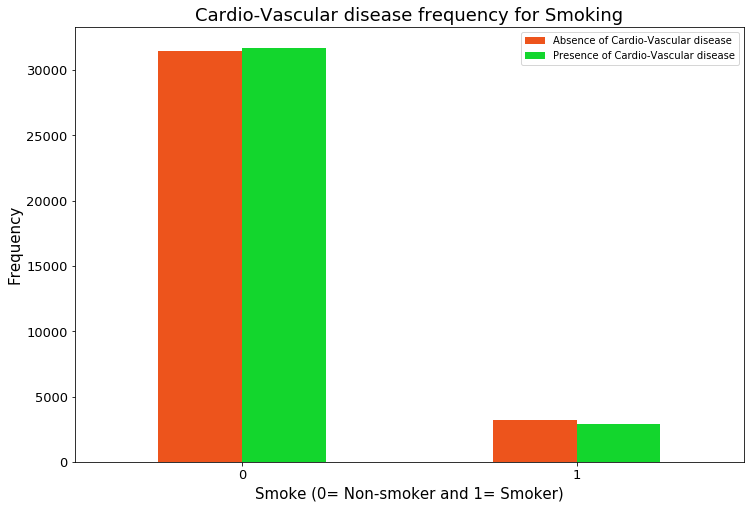

In [21]:
pd.crosstab(df['smoke'], df['cardio']).plot(kind= 'bar', figsize= (12, 8), color= ['#ed541c', '#13d62d'])
plt.title('Cardio-Vascular disease frequency for Smoking', size = 18)
plt.xlabel('Smoke (0= Non-smoker and 1= Smoker)', size= 15)
plt.ylabel('Frequency', size= 15)
plt.xticks(rotation= 0, size= 13)
plt.yticks(size= 13)
plt.legend(['Absence of Cardio-Vascular disease', 'Presence of Cardio-Vascular disease'])
plt.show()

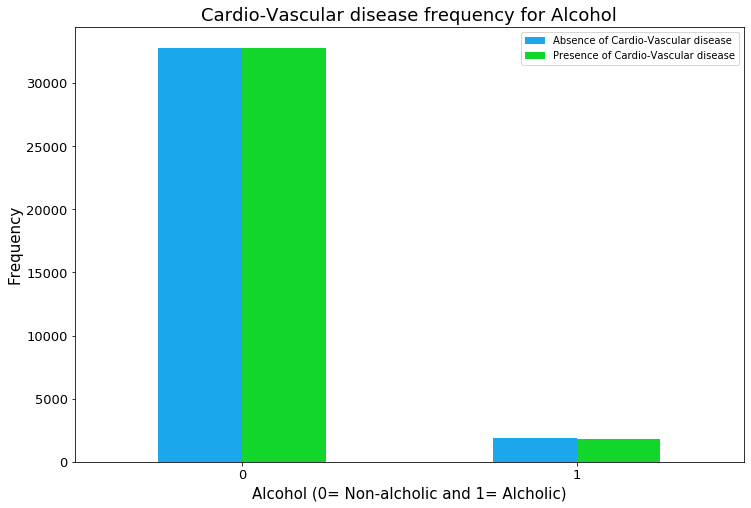

In [22]:
pd.crosstab(df['alco'], df['cardio']).plot(kind= 'bar', figsize= (12, 8), color= ['#1ca7ed', '#13d62d'])
plt.title('Cardio-Vascular disease frequency for Alcohol', size = 18)
plt.xlabel('Alcohol (0= Non-alcholic and 1= Alcholic)', size= 15)
plt.ylabel('Frequency', size= 15)
plt.xticks(rotation= 0, size= 13)
plt.yticks(size= 13)
plt.legend(['Absence of Cardio-Vascular disease', 'Presence of Cardio-Vascular disease'])
plt.show()

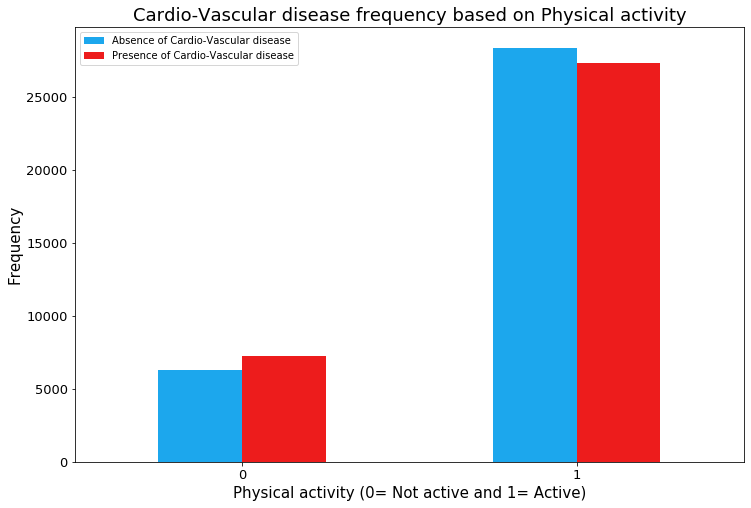

In [23]:
pd.crosstab(df['active'], df['cardio']).plot(kind= 'bar', figsize= (12, 8), color= ['#1ca7ed', '#ed1c1c'])
plt.title('Cardio-Vascular disease frequency based on Physical activity', size = 18)
plt.xlabel('Physical activity (0= Not active and 1= Active)', size= 15)
plt.ylabel('Frequency', size= 15)
plt.xticks(rotation= 0, size= 13)
plt.yticks(size= 13)
plt.legend(['Absence of Cardio-Vascular disease', 'Presence of Cardio-Vascular disease'])
plt.show()

In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0


In [25]:
# Change the column names
df.columns = ['id', 'age', 'gender', 'height', 'weight', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'physical_activity', 'cardio_vascular_disease']

#### Correlation plot

In [26]:
cnames = ['Age', 'systolic_blood_pressure ', 'diastolic_blood_pressure', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'physical_active']

In [27]:
df.head()

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,cardio_vascular_disease
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0


/home/devvrat/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


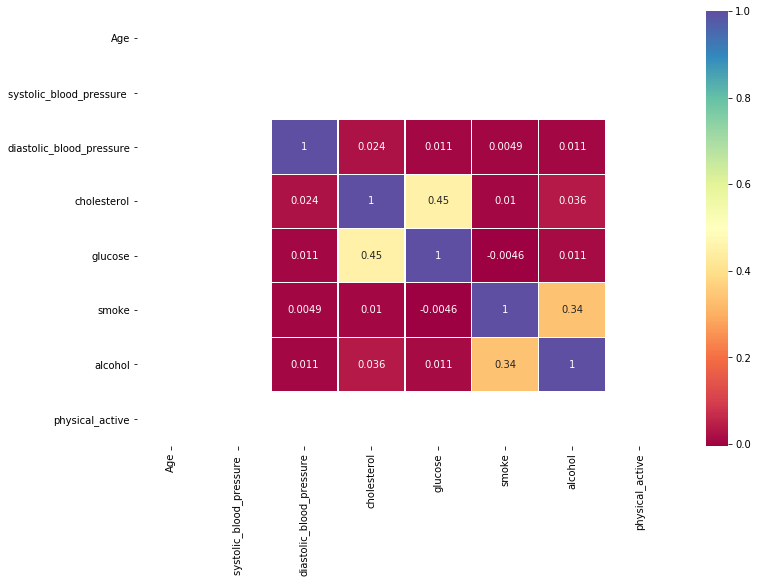

In [28]:
# Setting width and height of the plot
f, ax = plt.subplots(figsize= (12, 8))

# Correlation plot
df_corr = df.loc[:, cnames]

# Generate correlation matrix
corr = df_corr.corr()

# Plotting it using Seaborn library
sns.heatmap(corr, annot= True, cmap= 'Spectral', linewidth= 0.2)
plt.show()

In [29]:
save_data = df.to_csv('data/Processed_cardio.csv', index= False)

### Feature Selection

In [30]:
X = df[['age', 'weight', 'gender', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol', 'glucose', 'physical_activity']].values
#X = df.iloc[:, 1:12].values
X[:5]

array([[ 61,  69,   1, 130,  80,   2,   2,   1],
       [ 40,  71,   1, 110,  70,   1,   1,   1],
       [ 60,  70,   1, 120,  80,   1,   1,   1],
       [ 39,  85,   2, 120,  80,   1,   1,   1],
       [ 64,  62,   1, 120,  80,   1,   1,   1]])

In [31]:
y = df['cardio_vascular_disease'].values
y[:5]

array([0, 1, 0, 0, 0])

In [32]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() '''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler() '

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
'''
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    lr = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(train_score, test_score, i))
'''

'\nfor i in range(0, 30):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)\n    lr = LogisticRegression(C= 0.01, solver= \'liblinear\').fit(X_train, y_train)\n    lr.fit(X_train, y_train)\n    \n    train_score = lr.score(X_train, y_train)\n    test_score = lr.score(X_test, y_test)\n    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(train_score, test_score, i))\n'

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 17)
lr = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
yhat_lr = lr.predict(X_test)
yhat_lr[:15]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [38]:
print(classification_report(y_test, yhat_lr, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.70      0.76      0.73      8677
    Presence       0.73      0.67      0.70      8649

    accuracy                           0.71     17326
   macro avg       0.72      0.71      0.71     17326
weighted avg       0.72      0.71      0.71     17326



In [39]:
lr_precision = precision_score(y_test, yhat_lr)
lr_recall = recall_score(y_test, yhat_lr)
lr_f1 = f1_score(y_test, yhat_lr)
lr_accuracy = accuracy_score(y_test, yhat_lr)

### Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
'''
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    train_score = gnb.score(X_train, y_train)
    test_score = gnb.score(X_test, y_test)
    
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(train_score, test_score, i))
'''

'\nfor i in range(0, 30):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    gnb = GaussianNB()\n    gnb.fit(X_train, y_train)\n    \n    train_score = gnb.score(X_train, y_train)\n    test_score = gnb.score(X_test, y_test)\n    \n    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(train_score, test_score, i))\n'

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 10)
gnb = GaussianNB().fit(X_train, y_train)

In [43]:
yhat_gaussian = gnb.predict(X_test)
yhat_gaussian[:15]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [44]:
print(classification_report(y_test, yhat_gaussian, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.58      0.82      0.68      8700
    Presence       0.69      0.40      0.51      8626

    accuracy                           0.61     17326
   macro avg       0.63      0.61      0.59     17326
weighted avg       0.63      0.61      0.59     17326



In [45]:
gnb_precision = precision_score(y_test, yhat_gaussian)
gnb_recall = recall_score(y_test, yhat_gaussian)
gnb_f1 = f1_score(y_test, yhat_gaussian)
gnb_accuracy = accuracy_score(y_test, yhat_gaussian)

### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
'''
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    rfc = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= i)
    rfc.fit(X_train, y_train)
    
    train_score = rfc.score(X_train, y_train)
    test_score = rfc.score(X_test, y_test)
    
    print('Test: {:.3f}, Train: {:.3f} and Random state: {}'.format(test_score, train_score, i))
'''

"\nfor i in range(0, 20):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    rfc = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= i)\n    rfc.fit(X_train, y_train)\n    \n    train_score = rfc.score(X_train, y_train)\n    test_score = rfc.score(X_test, y_test)\n    \n    print('Test: {:.3f}, Train: {:.3f} and Random state: {}'.format(test_score, train_score, i))\n"

In [48]:
'''
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)
    rfc = RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state= i)
    rfc.fit(X_train, y_train)
    
    train_score = rfc.score(X_train, y_train)
    test_score = rfc.score(X_test, y_test)
    
    print('Test: {:.3f}, Train: {:.3f} and Random state: {}'.format(test_score, train_score, i))
'''

"\nfor i in range(0, 20):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    #X_train_scaled = scaler.fit_transform(X_train)\n    #X_test_scaled = scaler.transform(X_test)\n    rfc = RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state= i)\n    rfc.fit(X_train, y_train)\n    \n    train_score = rfc.score(X_train, y_train)\n    test_score = rfc.score(X_test, y_test)\n    \n    print('Test: {:.3f}, Train: {:.3f} and Random state: {}'.format(test_score, train_score, i))\n"

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 18)
rfc = RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state= 18).fit(X_train, y_train)

In [50]:
yhat_rfc = rfc.predict(X_test)
yhat_rfc[:15]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [51]:
print(classification_report(y_test, yhat_rfc, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.69      0.71      0.70      8667
    Presence       0.70      0.68      0.69      8659

    accuracy                           0.70     17326
   macro avg       0.70      0.70      0.70     17326
weighted avg       0.70      0.70      0.70     17326



In [52]:
rfc_precision = precision_score(y_test, yhat_rfc)
rfc_recall = recall_score(y_test, yhat_rfc)
rfc_f1 = f1_score(y_test, yhat_rfc)
rfc_accuracy = accuracy_score(y_test, yhat_rfc)

### Adaboost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
'''
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    ada = AdaBoostClassifier(n_estimators= 100, random_state= i).fit(X_train, y_train)
    
    train_score = ada.score(X_train, y_train)
    test_score = ada.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))
'''

'\nfor i in range(0, 20):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    \n    ada = AdaBoostClassifier(n_estimators= 100, random_state= i).fit(X_train, y_train)\n    \n    train_score = ada.score(X_train, y_train)\n    test_score = ada.score(X_test, y_test)\n    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))\n'

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 11)
    
ada = AdaBoostClassifier(n_estimators= 100, random_state= 11).fit(X_train, y_train)

In [56]:
yhat_ada = ada.predict(X_test)
yhat_ada[:15]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [57]:
print(classification_report(y_test, yhat_ada, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.71      0.81      0.75      8719
    Presence       0.77      0.66      0.71      8607

    accuracy                           0.73     17326
   macro avg       0.74      0.73      0.73     17326
weighted avg       0.74      0.73      0.73     17326



In [58]:
ada_precision = precision_score(y_test, yhat_ada)
ada_recall = recall_score(y_test, yhat_ada)
ada_f1 = f1_score(y_test, yhat_ada)
ada_accuracy = accuracy_score(y_test, yhat_ada)

### Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
'''
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state= i).fit(X_train, y_train)
    
    train_score = gbc.score(X_train, y_train)
    test_score = gbc.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))
'''

'\nfor i in range(0, 20):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    \n    gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state= i).fit(X_train, y_train)\n    \n    train_score = gbc.score(X_train, y_train)\n    test_score = gbc.score(X_test, y_test)\n    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))\n'

In [61]:
'''
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, random_state= i).fit(X_train, y_train)
    
    train_score = gbc.score(X_train, y_train)
    test_score = gbc.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))
'''

'\nfor i in range(0, 20):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    \n    gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, random_state= i).fit(X_train, y_train)\n    \n    train_score = gbc.score(X_train, y_train)\n    test_score = gbc.score(X_test, y_test)\n    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))\n'

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)
    
gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, random_state= 1).fit(X_train, y_train)

In [63]:
yhat_gbc = gbc.predict(X_test)
yhat_gbc[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [64]:
print(classification_report(y_test, yhat_gbc, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.70      0.79      0.74      8684
    Presence       0.76      0.66      0.71      8642

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.72     17326
weighted avg       0.73      0.73      0.72     17326



In [65]:
gbc_precision = precision_score(y_test, yhat_gbc)
gbc_recall = recall_score(y_test, yhat_gbc)
gbc_f1 = f1_score(y_test, yhat_gbc)
gbc_accuracy = accuracy_score(y_test, yhat_gbc)

### MLP Classifier

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
'''
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    mlp_classifier = MLPClassifier(random_state= i).fit(X_train, y_train)
    
    train_score = mlp_classifier.score(X_train, y_train)
    test_score = mlp_classifier.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))
'''

'\nfor i in range(0, 20):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)\n    \n    mlp_classifier = MLPClassifier(random_state= i).fit(X_train, y_train)\n    \n    train_score = mlp_classifier.score(X_train, y_train)\n    test_score = mlp_classifier.score(X_test, y_test)\n    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))\n'

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 5)

mlp_classifier = MLPClassifier(random_state= 5).fit(X_train, y_train)

In [69]:
yhat_mlp = mlp_classifier.predict(X_test)
yhat_mlp[:15]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [70]:
print(classification_report(y_test, yhat_mlp, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.72      0.77      0.74      8723
    Presence       0.74      0.69      0.72      8603

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.73     17326
weighted avg       0.73      0.73      0.73     17326



In [71]:
mlp_precision = precision_score(y_test, yhat_mlp)
mlp_recall = recall_score(y_test, yhat_mlp)
mlp_f1 = f1_score(y_test, yhat_mlp)
mlp_accuracy = accuracy_score(y_test, yhat_mlp)

### Evaluation DataFrame

In [72]:
columns = ['Precision', 'Recall', 'F1-score', 'Accuracy']
classifiers = ['Logistic Regression Classification', 'Naive Bayes Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'MLP Classifier']
data = [[lr_precision, lr_recall, lr_f1, lr_accuracy], 
        [gnb_precision, gnb_recall, gnb_f1, gnb_accuracy], 
        [rfc_precision, rfc_recall, rfc_f1, rfc_accuracy], 
        [ada_precision, ada_recall, ada_f1, ada_accuracy],
        [gbc_precision, gbc_recall, gbc_f1, gbc_accuracy],
        [mlp_precision, mlp_recall, mlp_f1, mlp_accuracy]
       ]

df_evaluation = pd.DataFrame(columns= columns, index= classifiers, data= data)
df_evaluation

,Precision,Recall,F1-score,Accuracy
Logistic Regression Classification,0.732627,0.671638,0.700808,0.713725
Naive Bayes Classifier,0.689717,0.398910,0.505472,0.611393
Random Forest Classifier,0.702054,0.682758,0.692272,0.696641
AdaBoost Classifier,0.772343,0.658650,0.710980,0.733984
Gradient Boosting Classifier,0.757411,0.662231,0.706630,0.725730
MLP Classifier,0.744282,0.692200,0.717297,0.729078


Here, if we see the different values of **Precision**, **Recall**, **F1-score** and **Accuracy**, we can see that __AdaBoost Classifier__ preferbly balances the evaluation metrics and gives as optimum results